<a href="https://colab.research.google.com/github/AlokRanjanSwain/ML-Projects/blob/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical;

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [4]:
def datasetCifar():
    # load cifar data
    (train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
    
    # Normalize X matrix
    train_norm = train_X.astype('float32')/255.0
    test_norm = test_X.astype('float32')/255.0
    
    # one hot encoding vector
    trainY = to_categorical(train_Y)
    testY = to_categorical(test_Y)
    
    return train_norm, trainY, test_norm, testY
    

In [5]:
def defineModel():
    
    model = Sequential()
    # 1st Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    # 2nd Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    # 3rd Conv Layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    # 4th Conv layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    # 5th Conv layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    # 6th Conv layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    #Flatten the conv layer
    model.add(Flatten())
    # add the dense layer
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # Final layer
    model.add(Dense(10, activation='softmax'))
    # optimizer
    opt = SGD(lr=0.001, momentum=0.9)
    # Model compile
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
def execute():
    # Getting the data set
    trainX, trainY, testX, testY = datasetCifar()
    
    # Get model 
    model = defineModel()
    
    # Training the model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    # print('Accuracy is : %.3f' % (acc * 100.0))
    return history,acc

In [12]:
def showPlots(history):
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    
    # pyplot.title('Classification Accuracy')
    # pyplot.plot(history.history['accuracy'], color='blue', label='train')
    # pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

Accuracy is : 84.040


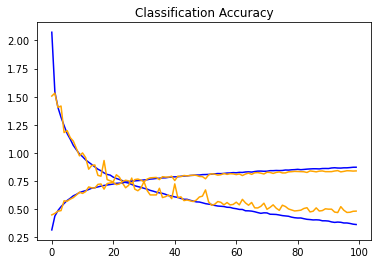

In [11]:
hist,ac=execute()
print('Accuracy is : %.3f' % (ac * 100.0))


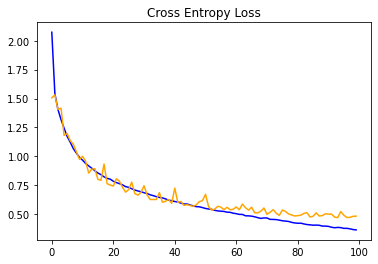

In [13]:
showPlots(hist)